# Importing Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Data collection and processing

In [97]:
#Loading the data from csv to pandas dataframe
car_dataset = pd.read_csv(r'C:\Users\raj_j\Downloads\Data Science\Machine Learning Projects\car data.csv')

#First 5 rows of dataframe
car_dataset.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### checking no. of rows and columns


In [98]:
car_dataset.shape 

(301, 9)

### getting some information about dataset

In [99]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Checking the number of missing values

In [100]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### checking the distribution of categotical data

In [101]:

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Encoding the Categorical data

### For fuel type, assigning 'Petrol' as '0' ,'Diesel' as '1' and 'CNG' as '2'

### For seller type,assigning 'Dealer' as '0' and 'Individual' as '1'.
### For transmission type,assigning 'Manual' as '0' and 'Automatic' as '1'
                  

In [102]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [103]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [104]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


### splitting the data into training and test data

In [105]:
#Firstly removing Car name and selling price variables from X variable(independent variable)
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1) 
Y=car_dataset['Selling_Price']

In [106]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [107]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Splitting 80% data into training data and rest 20% into test data

In [108]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# Training the Model by Linear Regression


In [109]:
#Loading the linear regression model
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation

### Prediction on Training Data

In [110]:
Linear_reg_training_data_prediction=lin_reg_model.predict(X_train)

### R squared error

In [111]:
Linear_reg_R2_error_train=metrics.r2_score(Y_train,Linear_reg_training_data_prediction)
print("R-squared error for training data =",Linear_reg_R2_error_train)

R-squared error for training data = 0.8838169193709796


# Plotting Actual and Predicted prices for training data by Linear Regression

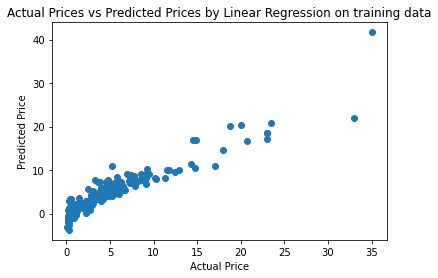

In [152]:
plt.scatter(Y_train,Linear_reg_training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by Linear Regression on training data")
plt.show()

### Prediction on Test Data

In [113]:
Linear_reg_test_data_prediction=lin_reg_model.predict(X_test)

### R squared error

In [114]:
Linear_reg_R2_error_test=metrics.r2_score(Y_test,Linear_reg_test_data_prediction)
print("R-squared error for test data =",Linear_reg_R2_error_test)

R-squared error for test data = 0.8401532365377784


# Plotting Actual and Predicted prices for test data by Linear Regression

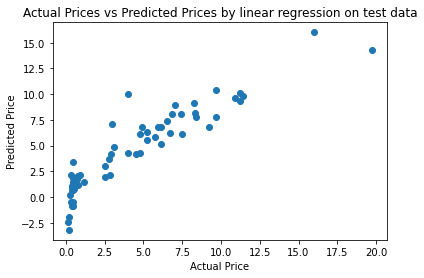

In [153]:
plt.scatter(Y_test,Linear_reg_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by linear regression on test data")
plt.show()

# Training the Model by Lasso Regression


In [116]:
#Loading the lasso regression model
lasso_reg_model=Lasso()
lasso_reg_model.fit(X_train,Y_train)

Lasso()

### Model Evaluation

### Prediction on Training Data

In [117]:
Lasso_reg_training_data_prediction=lasso_reg_model.predict(X_train)

### R squared error

In [118]:
Lasso_reg_R2_error_train=metrics.r2_score(Y_train,Lasso_reg_training_data_prediction)
print("R-squared error for training data =",Lasso_reg_R2_error_train)

R-squared error for training data = 0.8435873952582827


# Plotting actual and predicted prices for training data by Lasso Regression

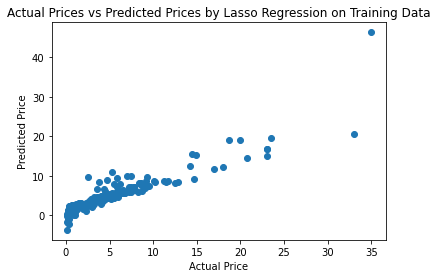

In [119]:
plt.scatter(Y_train,Lasso_reg_training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by Lasso Regression on Training Data")
plt.show()

### Prediction on Test Data

In [120]:
Lasso_reg_test_data_prediction=lasso_reg_model.predict(X_test)

### R squared error

In [121]:
Lasso_reg_R2_error_test=metrics.r2_score(Y_test,Lasso_reg_test_data_prediction)
print("R-squared error for test data =",Lasso_reg_R2_error_test)

R-squared error for test data = 0.8497457570738539


# Plotting actual and predicted prices for test data by Lasso Regression

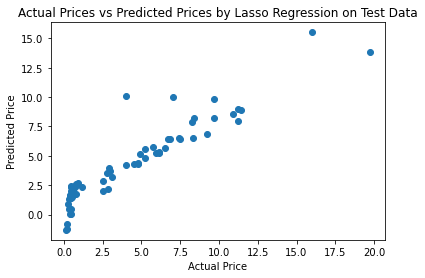

In [122]:
plt.scatter(Y_test,Lasso_reg_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by Lasso Regression on Test Data")
plt.show()

# Training the Model by Random Forest Regression


In [124]:
#Loading the random forest regression model
random_forest_reg_model=RandomForestRegressor(n_estimators=280,random_state=0)
random_forest_reg_model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=280, random_state=0)

### Model Evaluation

### Prediction on Training Data

In [128]:
random_forest_training_data_prediction=random_forest_reg_model.predict(X_train)

### R squared error

In [129]:
random_forest_reg_R2_error_train=metrics.r2_score(Y_train,random_forest_training_data_prediction)
print("R-squared error for training data =",random_forest_reg_R2_error_train)

R-squared error for training data = 0.9883550236235192


# Plotting actual and predicted prices for training data by Random Forest Regression

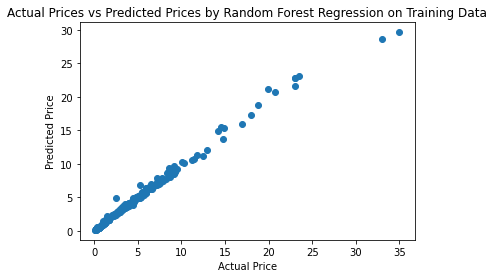

In [137]:
plt.scatter(Y_train,random_forest_training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by Random Forest Regression on Training Data")
plt.show()

### Prediction on Test Data

In [138]:
random_forest_test_data_prediction=random_forest_reg_model.predict(X_test)

### R squared error

In [139]:
random_forest_reg_R2_error_test=metrics.r2_score(Y_test,random_forest_test_data_prediction)
print("R-squared error for test data =",random_forest_reg_R2_error_test)

R-squared error for test data = 0.9610538043915285


# Plotting actual and predicted prices for test data by Random Forest Regression

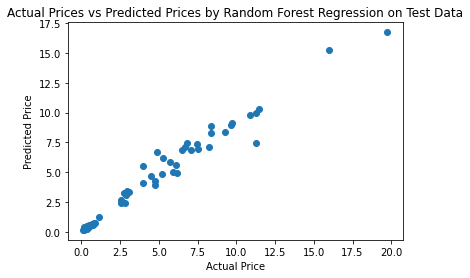

In [141]:
plt.scatter(Y_test,random_forest_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by Random Forest Regression on Test Data")
plt.show()

# Comparing the three Regression Models on test data:  
## Linear,Lasso and Random Forest Regression

In [144]:
print("R-squared percentage for Linear Regression =",Linear_reg_R2_error_test*100,"%")
print("R-squared percentage for Lasso Regression =",Lasso_reg_R2_error_test*100,"%")
print("R-squared percentage for Random Forest Regression =",random_forest_reg_R2_error_test*100,"%")


R-squared percentage for Linear Regression = 84.01532365377784 %
R-squared percentage for Lasso Regression = 84.9745757073854 %
R-squared percentage for Random Forest Regression = 96.10538043915285 %


## Plotting the graphs of Linear,Lasso and Random Forest regressions

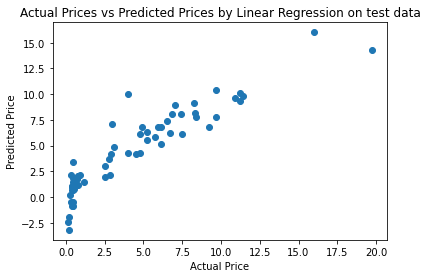

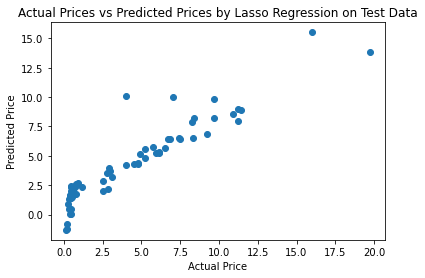

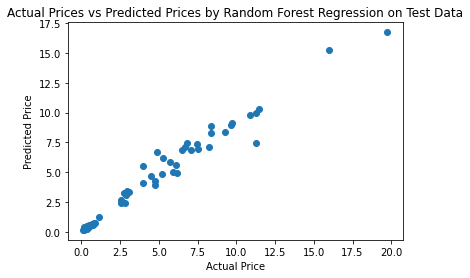

In [154]:
plt.scatter(Y_test,Linear_reg_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by Linear Regression on test data")
plt.show()

plt.scatter(Y_test,Lasso_reg_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by Lasso Regression on Test Data")
plt.show()

plt.scatter(Y_test,random_forest_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices by Random Forest Regression on Test Data")
plt.show()